In [1]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

주가 데이터 불러오기

In [2]:
def filter_df(df): #데이터프레임 필터링
    # 첫 번째 열에서 같은 값을 가진 행의 수를 계산합니다.
    row_counts = df['0'].value_counts()

    # 가장 많은 행의 수를 찾습니다.
    max_row_count = row_counts.max()

    # 가장 많은 행의 수에 해당하는 행만 분류합니다.
    filtered = pd.DataFrame(df[df['0'].isin(row_counts[row_counts == max_row_count].index)])

    return filtered

def rename_columns(df):
    new_columns = {column: i for i, column in enumerate(df.columns)}
    df.rename(columns=new_columns, inplace=True)
    
    return df

# 데이터 로드   
stock_df = pd.read_csv('/Users/moon/Desktop/Moon SeungHoo/Stock_Machine_Learning/StockData.csv',low_memory=False)
pred_df = pd.read_csv('/Users/moon/Desktop/Moon SeungHoo/Stock_Machine_Learning/StockData_Pred.csv',low_memory=False)

#데이터 필터링
filter_stock = filter_df(stock_df)
filter_label = filter_stock['18']

filter_pred= filter_df(pred_df)

# 예측에 필요한 데이터 
pred_ticker = filter_pred['0']#종목코드 저장

# 불필요한 데이터 삭제
filter_stock = filter_stock.drop({'0','1','7','18'},axis=1) #날자, 상승율, 5%이상 상승여부 삭제 
filter_pred = filter_pred.drop({'0','1','7'},axis=1)#날자, 상승율 삭제

#열 이름 초기화
filter_stock = rename_columns(filter_stock)
filter_pred = rename_columns(filter_pred)


데이터 분할

In [3]:
# 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(filter_stock, filter_label, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(n_estimators=1000, random_state=42,verbose=2, n_jobs=8)

# 모델 학습
model.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   17.0s


building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000


[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  1.4min


building tree 155 of 1000
building tree 156 of 1000
building tree 157 of 1000
building tree 158 of 1000
building tree 159 of 1000
building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tre

[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  3.3min


building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tre

[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  5.8min


building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tre

[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  9.2min finished


RandomForestClassifier(n_estimators=1000, n_jobs=8, random_state=42, verbose=2)

모델 평가

In [4]:
# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    2.0s


모델 정확도: 0.9719893065945311


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    3.3s finished


예측

In [5]:
def make_six_digit_list(input_list):
    six_digit_list = []

    for item in input_list:
        # 현재 항목의 길이를 확인
        item_str = str(item)
        item_len = len(item_str)

        if item_len < 6:
            # 6자리가 안되는 항목은 앞에 0을 채워서 6자리로 만듭니다.
            zero_padding = '0' * (6 - item_len)
            six_digit_item = zero_padding + item_str
            six_digit_list.append(six_digit_item)
        else:
            # 이미 6자리인 경우 그대로 유지
            six_digit_list.append(item_str)

    return six_digit_list

In [6]:
T_pred = model.predict(filter_pred)

# 5% 이상 오를 종목 식별
rising_stocks = [ticker for i, ticker in enumerate(pred_ticker) if T_pred[i] > 0.9]
rising_stocks = list(map(str, rising_stocks))
result = list(set(rising_stocks))
result = make_six_digit_list(result)
print("내일 5% 이상 상승할 종목:", result)
print(len(result))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s


내일 5% 이상 상승할 종목: ['038870', '357880', '099190', '091970', '290090', '034940', '223250', '071460', '003010', '014530', '129920', '087260', '020710', '100590', '264850', '257720', '352910', '347000', '232830', '189690', '168360', '047310', '046970', '064480', '024740', '016920', '002360', '131370', '005110', '214610', '049480', '041020', '241710', '218150', '110990', '128660', '191410', '002880', '152550', '114630', '032820', '026150', '294630', '000440', '065420', '009835', '054450', '062970', '065450', '079550', '009420', '054040', '407400', '115500', '330350', '045660', '031860', '220100', '005860', '412350', '010820', '368770', '053050', '088800', '065350', '016740', '051380', '417180', '056360', '037950', '035460', '131970', '072520', '417500', '094170', '013360', '138490', '115610', '117580', '396270', '354200', '004090', '258830', '094940', '002800', '358570', '328380', '027830', '086450', '004270', '203650', '419050', '091440', '024060', '039490', '323230', '039010', '239340', '3

[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished


예측한 결과 검증

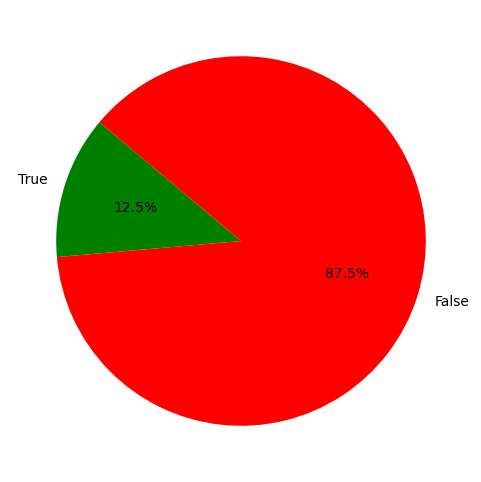

In [7]:
def check_price_increase(stock_codes):
    result = {}
    
    for code in stock_codes:
        df = fdr.DataReader(code,'2023-10-12','2023-10-13')
                
        if len(df) < 2:
            result[code] = False
        else:
            today_close = df['Change'].iloc[-1]

            if today_close >=  0.05:
                result[code] = True
            else:
                result[code] = False
    return result

result_TF = check_price_increase(result)
result_TF = list(result_TF.values())

# True와 False의 개수를 세어 비율을 계산
true_count = sum(result_TF)
false_count = len(result_TF) - true_count

# 비율을 파이그래프로 표현
labels = ['True', 'False']
sizes = [true_count, false_count]
colors = ['green', 'red']

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# 그래프 표시
plt.show() 